In [1]:
import numpy as np
import pandas as pd
import os
import json

import imageio
import geopandas
from shapely.geometry import Point, Polygon

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm
import matplotlib.patches as mpatches
import seaborn as sns
%matplotlib inline

# Sample points uniformly from labeled Africa datasets

## Senegal

In [4]:
senegal = geopandas.read_file('../mount/data/senegal_parcels/SenegalFields_03_26.shp')
senegal['image_id'] = [str(x).zfill(5) for x in np.arange(senegal.shape[0])]
senegal['x'] = senegal['geometry'].centroid.map(lambda x: x.x)
senegal['y'] = senegal['geometry'].centroid.map(lambda x: x.y)

In [65]:
senegal.head()

Name  Shape_Leng  Shape_Area   x_long    y_lat YIELDS_Ton  Village_Nu  \
0  52_10_01  666.914079    6.354129 -14.6905  14.3526        n/a          52   
1  52_12_02  916.239298   10.690628 -14.6830  14.3576        n/a          52   
2  52_08_01  508.584769    3.737343 -14.6860  14.3435        n/a          52   
3  52_09_02  565.753095    3.840578 -14.6773  14.3349        n/a          52   
4  65_03_04  826.414737    4.953531 -14.6226  14.3002        n/a          65   

   HH_Number  Field_Numb   V_HH  ...  crop_gro_2 crop_gro_3  PC_2019 PC_2018  \
0         10           1  52_10  ...           1          4        2    #N/A   
1         12           2  52_12  ...           1          2        2       1   
2          8           1   52_8  ...           7          2        2       1   
3          9           2   52_9  ...           2          1        1       1   
4          3           4   65_3  ...           2          1        2       3   

  PC_2017 PC_2016                                           geometry  \
0       2    #N/A  POLYGON Z ((-14.68994 14.35252 0.00000, -14.69...   
1       1       3  POLYGON Z ((-14.68371 14.35627 0.00000, -14.68...   
2    #N/A       2  POLYGON Z ((-14.68629 14.34425 0.00000, -14.68...   
3       2       2  POLYGON Z ((-14.67830 14.33462 0.00000, -14.67...   
4       1       2  POLYGON Z ((-14.62384 14.30050 0.00000, -14.62...   

           x          y image_id  
0 -14.690541  14.352588    00000  
1 -14.682993  14.357642    00001  
2 -14.686013  14.343506    00002  
3 -14.677289  14.334870    00003  
4 -14.622612  14.300194    00004  

[5 rows x 24 columns]

In [148]:
samples = senegal.sample(n=10, replace=False)
samples['min_lon'] = samples['x'] - 0.5 * 1./(111111. * np.cos(samples['y'] * np.pi / 180.)) * 450 * 3
samples['min_lat'] = samples['y'] - 0.5 * 1./111111. * 450 * 3
samples['max_lon'] = samples['x'] + 0.5 * 1./(111111. * np.cos(samples['y'] * np.pi / 180.)) * 450 * 3
samples['max_lat'] = samples['y'] + 0.5 * 1./111111. * 450 * 3
samples = samples[['image_id', 'min_lon', 'min_lat', 'max_lon', 'max_lat']].reset_index(drop=True)

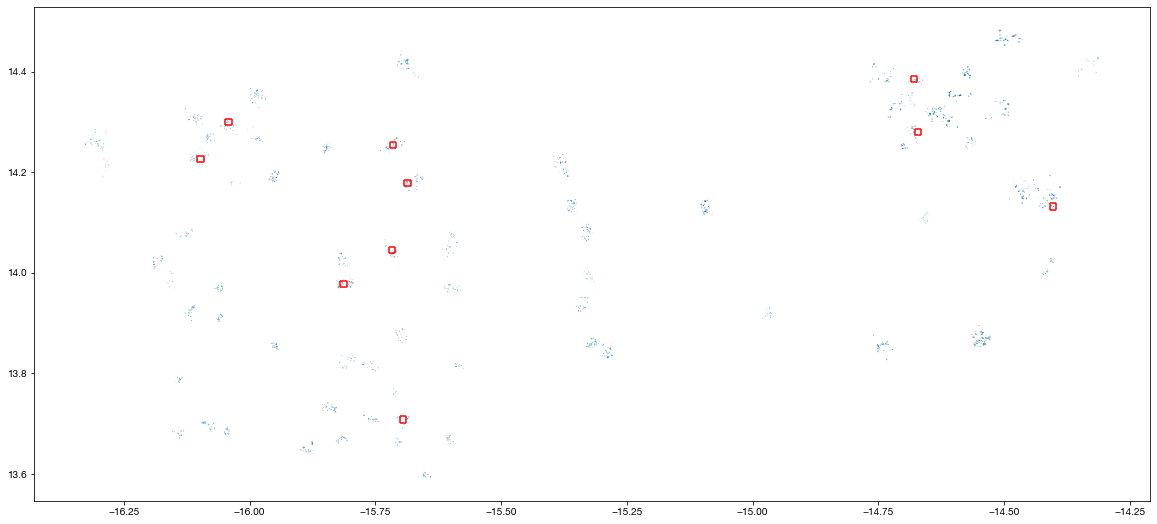

In [157]:
samples = pd.read_csv('../data/planet/senegal/bbox10.csv')

fig, ax = plt.subplots(1, figsize=(20,10))
senegal.plot(ax=ax)

for i, row in samples.iterrows():
    ax.vlines(row['min_lon'], row['min_lat'], row['max_lat'], color='red')
    ax.vlines(row['max_lon'], row['min_lat'], row['max_lat'], color='red')
    ax.hlines(row['min_lat'], row['min_lon'], row['max_lon'], color='red')
    ax.hlines(row['max_lat'], row['min_lon'], row['max_lon'], color='red')
plt.show()

In [150]:
samples.head()

image_id    min_lon    min_lat    max_lon    max_lat
0    02375 -15.701272  13.702309 -15.688765  13.714459
1    02140 -15.722610  14.038382 -15.710086  14.050532
2    01155 -14.686087  14.378474 -14.673543  14.390624
3    00635 -16.103928  14.220150 -16.091394  14.232300
4    00817 -14.676953  14.274006 -14.664416  14.286156

In [151]:
samples[['image_id', 'min_lon', 'min_lat', 'max_lon', 'max_lat']].to_csv(
    '../data/planet/senegal/bbox10.csv', index=False)

## Ghana

In [160]:
df = pd.read_csv('../mount/data/udry_parcels/udry_fields_2017.csv')
df['label_id'] = [str(x).zfill(5) for x in np.arange(df.shape[0])]

In [161]:
df.head()

system:index          area   area_ha       crop  \
0  0000da056fde6595a57d  12489.637500  1.252312  Intercrop   
1  00003f7f743892487565  19735.391306  1.926950  Intercrop   
2  00007831095d8bdfb0eb   9578.674355  0.974940  Groundnut   
3  000088fed6ddf3b021ab  14294.594403  1.455630      Maize   
4  0000205388e34b79ebac   9898.404265  0.991360      Maize   

                 dataset  geom_id                           merge_id  \
0  Ghana_UDRY_2017_final      659  Track_2017_06_13_103011_Asseiyili   
1  Ghana_UDRY_2017_final      682  Track_2017_06_13_105324_Asseiyili   
2  Ghana_UDRY_2017_final      714  Track_2017_06_13_111916_Asseiyili   
3  Ghana_UDRY_2017_final      662  Track_2017_06_13_103434_Asseiyili   
4  Ghana_UDRY_2017_final      643  Track_2017_06_13_101739_Asseiyili   

        yield                                               .geo label_id  
0         NaN  {"type":"Polygon","coordinates":[[[-1.21436227...    00000  
1         NaN  {"type":"Polygon","coordinates":[[[-1.21642690...    00001  
2  102.570387  {"type":"Polygon","coordinates":[[[-1.21534968...    00002  
3  309.144465  {"type":"Polygon","coordinates":[[[-1.21593314...    00003  
4   10.087157  {"type":"Polygon","coordinates":[[[-1.21624735...    00004

In [162]:
geom_types
for i, row in df.iterrows():
    row_geom = eval(row['.geo'])
    geom_types.append(row_geom['type'])

In [163]:
np.unique(geom_types)

array(['GeometryCollection', 'LineString', 'MultiPolygon', 'Point',
       'Polygon'], dtype='<U18')

In [164]:
label_ids = []
polygons = []
for i, row in df.iterrows():
    row_geom = eval(row['.geo'])
    if row_geom['type'] == 'GeometryCollection':
        for geom in row_geom['geometries']:
            if geom['type'] == 'Polygon':
                label_ids.append(row['label_id'])
                poly = Polygon(geom['coordinates'][0])
                polygons.append(poly)
            elif geom['type'] == 'MultiPolygon':
                for inner_geom in geom['coordinates']:
                    label_ids.append(row['label_id'])
                    poly = Polygon(inner_geom[0])
                    polygons.append(poly)
                
    elif row_geom['type'] == 'Polygon':
        label_ids.append(row['label_id'])
        poly = Polygon(row_geom['coordinates'][0])
        polygons.append(poly)
        
    elif row_geom['type'] == 'MultiPolygon':
        for geom in row_geom['coordinates']:
            label_ids.append(row['label_id'])
            poly = Polygon(geom[0])
            polygons.append(poly)

In [166]:
udry = pd.DataFrame({
    'label_id': label_ids,
    'geometry': polygons
})
columns = ['dataset', 'crop', 'geom_id', 'merge_id', 'yield', 'area_ha', 'area', 'label_id']
udry = udry.merge(df[columns], on='label_id', how='left')
udry['image_id'] = [str(x).zfill(5) for x in np.arange(udry.shape[0])]

In [169]:
geodf = geopandas.GeoDataFrame(udry, geometry='geometry')
geodf.head()

label_id                                           geometry  \
0    00000  POLYGON ((-1.21436 9.56871, -1.21427 9.56853, ...   
1    00001  POLYGON ((-1.21643 9.56705, -1.21634 9.56701, ...   
2    00002  POLYGON ((-1.21535 9.56665, -1.21468 9.56642, ...   
3    00003  POLYGON ((-1.21593 9.56566, -1.21575 9.56562, ...   
4    00004  POLYGON ((-1.21625 9.56485, -1.21602 9.56481, ...   

                 dataset       crop  geom_id  \
0  Ghana_UDRY_2017_final  Intercrop      659   
1  Ghana_UDRY_2017_final  Intercrop      682   
2  Ghana_UDRY_2017_final  Groundnut      714   
3  Ghana_UDRY_2017_final      Maize      662   
4  Ghana_UDRY_2017_final      Maize      643   

                            merge_id       yield   area_ha          area  \
0  Track_2017_06_13_103011_Asseiyili         NaN  1.252312  12489.637500   
1  Track_2017_06_13_105324_Asseiyili         NaN  1.926950  19735.391306   
2  Track_2017_06_13_111916_Asseiyili  102.570387  0.974940   9578.674355   
3  Track_2017_06_13_103434_Asseiyili  309.144465  1.455630  14294.594403   
4  Track_2017_06_13_101739_Asseiyili   10.087157  0.991360   9898.404265   

  image_id  
0    00000  
1    00001  
2    00002  
3    00003  
4    00004

In [188]:
geodf['x'] = geodf['geometry'].centroid.map(lambda x: x.x)
geodf['y'] = geodf['geometry'].centroid.map(lambda x: x.y)

samples = geodf.sample(n=10, replace=False)
samples['min_lon'] = samples['x'] - 0.5 * 1./(111111. * np.cos(samples['y'] * np.pi / 180.)) * 450 * 3
samples['min_lat'] = samples['y'] - 0.5 * 1./111111. * 450 * 3
samples['max_lon'] = samples['x'] + 0.5 * 1./(111111. * np.cos(samples['y'] * np.pi / 180.)) * 450 * 3
samples['max_lat'] = samples['y'] + 0.5 * 1./111111. * 450 * 3
samples = samples[['image_id', 'min_lon', 'min_lat', 'max_lon', 'max_lat']].reset_index(drop=True)

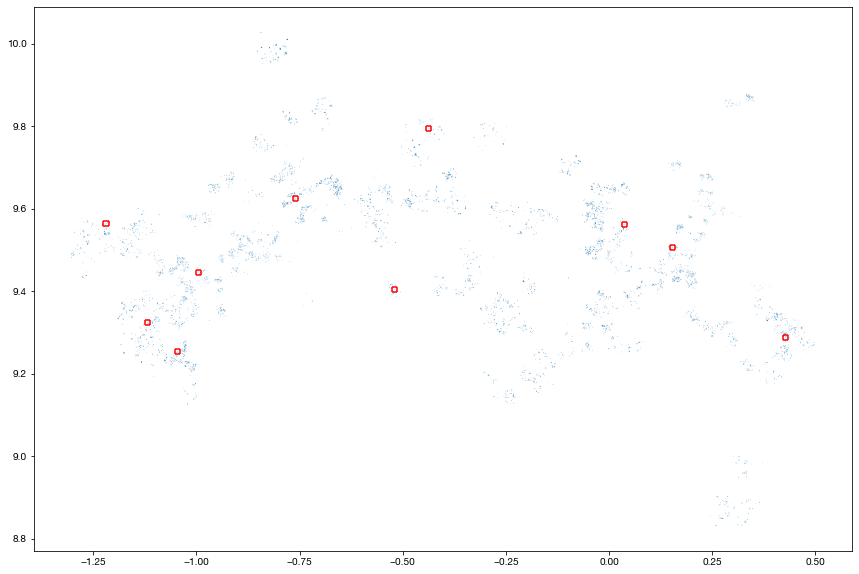

In [189]:
fig, ax = plt.subplots(1, figsize=(20,10))
geodf.plot(ax=ax)

for i, row in samples.iterrows():
    ax.vlines(row['min_lon'], row['min_lat'], row['max_lat'], color='red')
    ax.vlines(row['max_lon'], row['min_lat'], row['max_lat'], color='red')
    ax.hlines(row['min_lat'], row['min_lon'], row['max_lon'], color='red')
    ax.hlines(row['max_lat'], row['min_lon'], row['max_lon'], color='red')
plt.show()

In [190]:
samples[['image_id', 'min_lon', 'min_lat', 'max_lon', 'max_lat']].to_csv(
    '../data/planet/ghana/udry/bbox10.csv', index=False)

## Malawi

In [132]:
df = pd.read_csv('../mount/data/malawi_parcels/malawi_WFP_fields_2018.csv')
df['label_id'] = [str(x).zfill(5) for x in np.arange(df.shape[0])]

In [133]:
df.head()

system:index    CODE  CROP  \
0  000000000000000001ef  120018     1   
1  00000000000000000220      78     1   
2  000000000000000001d7      12     1   
3  000000000000000001d9      12     1   
4  000000000000000001db      12     1   

                                             Comment  CropType  \
0                             Field partly harvested         1   
1  A very big field of pigeon peas belonging to a...         1   
2                                      Weeds present         1   
3                                    Weeds available         1   
4                                    Weeds available         1   

         CropType_l        ID  IRRIGATION              LC           area  \
0  Cultivated Field  29614903           0  Maize / Millet    8437.338626   
1  Cultivated Field  29616702           0     Pigeon Peas  101795.943094   
2  Cultivated Field  29614843           0           Maize    5322.467267   
3  Cultivated Field  29614845           0           Maize    2258.955917   
4  Cultivated Field  29614847           0           Maize   12497.676621   

                                                .geo label_id  
0  {"type":"GeometryCollection","geometries":[{"t...    00000  
1  {"type":"GeometryCollection","geometries":[{"t...    00001  
2  {"type":"Polygon","coordinates":[[[33.43254717...    00002  
3  {"type":"Polygon","coordinates":[[[33.43079029...    00003  
4  {"type":"Polygon","coordinates":[[[33.43099534...    00004

In [111]:
np.unique(geom_types)

array(['GeometryCollection', 'MultiPolygon', 'Polygon'], dtype='<U18')

In [137]:
label_ids = []
polygons = []
for i, row in df.iterrows():
    row_geom = eval(row['.geo'])
    if row_geom['type'] == 'GeometryCollection':
        for geom in row_geom['geometries']:
            if geom['type'] == 'Polygon':
                label_ids.append(row['label_id'])
                poly = Polygon(geom['coordinates'][0])
                polygons.append(poly)
            elif geom['type'] == 'MultiPolygon':
                for inner_geom in geom['coordinates']:
                    label_ids.append(row['label_id'])
                    poly = Polygon(inner_geom[0])
                    polygons.append(poly)
                
    elif row_geom['type'] == 'Polygon':
        label_ids.append(row['label_id'])
        poly = Polygon(row_geom['coordinates'][0])
        polygons.append(poly)
        
    elif row_geom['type'] == 'MultiPolygon':
        for geom in row_geom['coordinates']:
            label_ids.append(row['label_id'])
            poly = Polygon(geom[0])
            polygons.append(poly)

In [138]:
malawi = pd.DataFrame({
    'label_id': label_ids,
    'geometry': polygons
})
columns = ['CODE', 'CROP', 'Comment', 'CropType', 'CropType_l', 'ID', 'IRRIGATION', 'LC', 'area', 'label_id']
malawi = malawi.merge(df[columns], on='label_id', how='left')
malawi['image_id'] = [str(x).zfill(5) for x in np.arange(malawi.shape[0])]

In [145]:
geodf = geopandas.GeoDataFrame(malawi, geometry='geometry')
geodf.head()

label_id                                           geometry    CODE  CROP  \
0    00000  POLYGON ((33.52883 -13.24086, 33.52885 -13.240...  120018     1   
1    00001  POLYGON ((33.43312 -13.34411, 33.43508 -13.345...      78     1   
2    00002  POLYGON ((33.43255 -13.36306, 33.43311 -13.363...      12     1   
3    00003  POLYGON ((33.43079 -13.34544, 33.43082 -13.345...      12     1   
4    00004  POLYGON ((33.43100 -13.34630, 33.43226 -13.346...      12     1   

                                             Comment  CropType  \
0                             Field partly harvested         1   
1  A very big field of pigeon peas belonging to a...         1   
2                                      Weeds present         1   
3                                    Weeds available         1   
4                                    Weeds available         1   

         CropType_l        ID  IRRIGATION              LC           area  \
0  Cultivated Field  29614903           0  Maize / Millet    8437.338626   
1  Cultivated Field  29616702           0     Pigeon Peas  101795.943094   
2  Cultivated Field  29614843           0           Maize    5322.467267   
3  Cultivated Field  29614845           0           Maize    2258.955917   
4  Cultivated Field  29614847           0           Maize   12497.676621   

  image_id  
0    00000  
1    00001  
2    00002  
3    00003  
4    00004

In [152]:
geodf['x'] = geodf['geometry'].centroid.map(lambda x: x.x)
geodf['y'] = geodf['geometry'].centroid.map(lambda x: x.y)

samples = geodf.sample(n=10, replace=False)
samples['min_lon'] = samples['x'] - 0.5 * 1./(111111. * np.cos(samples['y'] * np.pi / 180.)) * 450 * 3
samples['min_lat'] = samples['y'] - 0.5 * 1./111111. * 450 * 3
samples['max_lon'] = samples['x'] + 0.5 * 1./(111111. * np.cos(samples['y'] * np.pi / 180.)) * 450 * 3
samples['max_lat'] = samples['y'] + 0.5 * 1./111111. * 450 * 3
samples = samples[['image_id', 'min_lon', 'min_lat', 'max_lon', 'max_lat']].reset_index(drop=True)

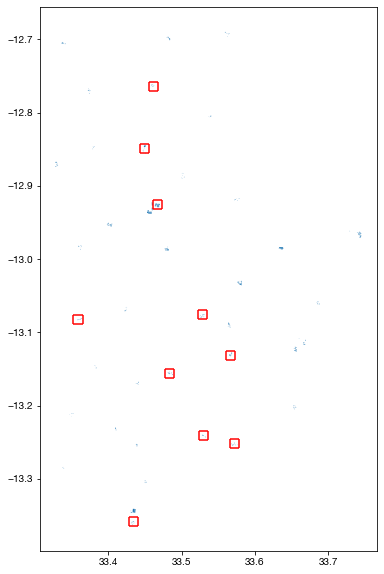

In [154]:
fig, ax = plt.subplots(1, figsize=(20,10))
geodf.plot(ax=ax)

for i, row in samples.iterrows():
    ax.vlines(row['min_lon'], row['min_lat'], row['max_lat'], color='red')
    ax.vlines(row['max_lon'], row['min_lat'], row['max_lat'], color='red')
    ax.hlines(row['min_lat'], row['min_lon'], row['max_lon'], color='red')
    ax.hlines(row['max_lat'], row['min_lon'], row['max_lon'], color='red')
plt.show()

In [156]:
samples[['image_id', 'min_lon', 'min_lat', 'max_lon', 'max_lat']].to_csv(
    '../data/planet/malawi/bbox10.csv', index=False)